<a href="https://colab.research.google.com/github/Javcm/Intro-a-Deep-Learning-UNAM-FC/blob/main/Tutorial_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualizando datos con Matplotlib

Usaremos una base de datos de suicidios para ilustrar el poder de Matplolib, pero primero un par de ejemplos sencillos...

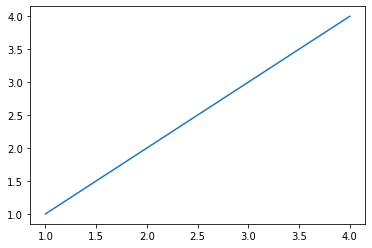

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4])
y = np.array([1, 2, 3, 4])

plt.plot(x,y) 

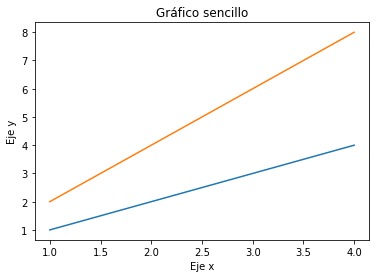

In [2]:
#Agregando títulos y etiquetas
plt.plot(x,y)
plt.plot(x,2*y)

plt.title("Gráfico sencillo")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.show()

#Truco para que se vean más cool las gráficas
import seaborn as snb; snb.set();


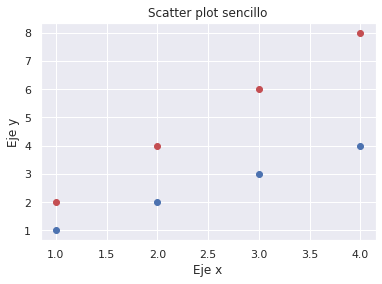

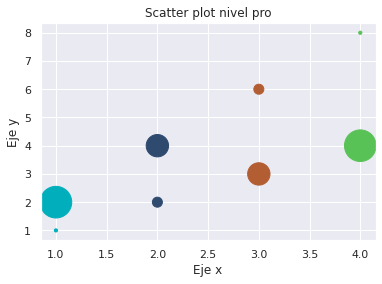

In [18]:
#Truco para que se vean más cool las gráficas
import seaborn as snb; snb.set();

#Dos formas de hacer un scatter plot

#Escogiendo puntos en lugar de lineas en plt.plot()
plt.plot(x,y,"bo")
plt.plot(x,2*y,"ro")

plt.title("Scatter plot sencillo")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.show()

#Usando plt.scatter()
plt.scatter(x,y,c=["#00afbb","#2e4a6e","#b35d32","#59c257"],s=[10,100,500,1000])
plt.scatter(x,2*y,c=["#00afbb","#2e4a6e","#b35d32","#59c257"],s=[1000,500,100,10])

plt.title("Scatter plot nivel pro")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.show()

Bueno, ahora sí veamos datos reales

In [19]:

from google.colab import drive
drive.mount("/content/gdrive/")

import pandas as pd
base_path = "/content/gdrive/My Drive/UNAM/TSFC III 2021-2/Tutoriales_de_Introducción/Tutorial Matplotlib/"
df = pd.read_csv(base_path + "suicide_data.csv")
df.head()

Mounted at /content/gdrive/


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


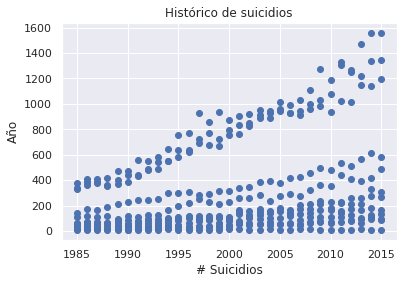

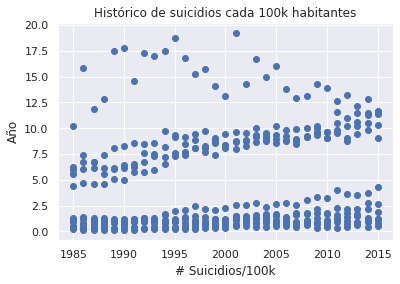

In [65]:
x = df[df["country"]=="Mexico"]["year"]
y = df[df["country"]=="Mexico"]["suicides_no"]
y_escal = df[df["country"]=="Mexico"]["suicides/100k pop"]

plt.scatter(x,y) 
plt.title("Histórico de suicidios")
plt.xlabel("# Suicidios")
plt.ylabel("Año")
plt.show()


plt.scatter(x,y_escal)
plt.title("Histórico de suicidios cada 100k habitantes")
plt.xlabel("# Suicidios/100k")
plt.ylabel("Año")
plt.show()

#Nota: Esta es una muy mala representación de los datos, no es muy fácil de interpretar

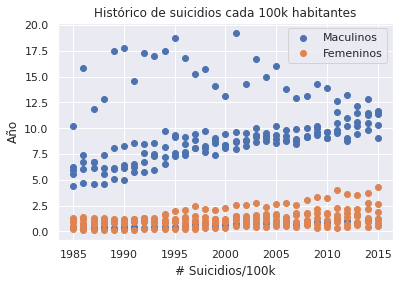

In [66]:
x_male = df[(df["country"]=="Mexico")&(df["sex"]=="male")]["year"]
y_male = df[(df["country"]=="Mexico")&(df["sex"]=="male")]["suicides/100k pop"]

x_female = df[(df["country"]=="Mexico")&(df["sex"]=="female")]["year"]
y_female = df[(df["country"]=="Mexico")&(df["sex"]=="female")]["suicides/100k pop"]


plt.scatter(x_male,y_male,label="Maculinos")
plt.scatter(x_female,y_female,label="Femeninos")
plt.title("Histórico de suicidios cada 100k habitantes")
plt.xlabel("# Suicidios/100k")
plt.ylabel("Año")
plt.legend(loc="best")
plt.show()

#Haciendo subplots

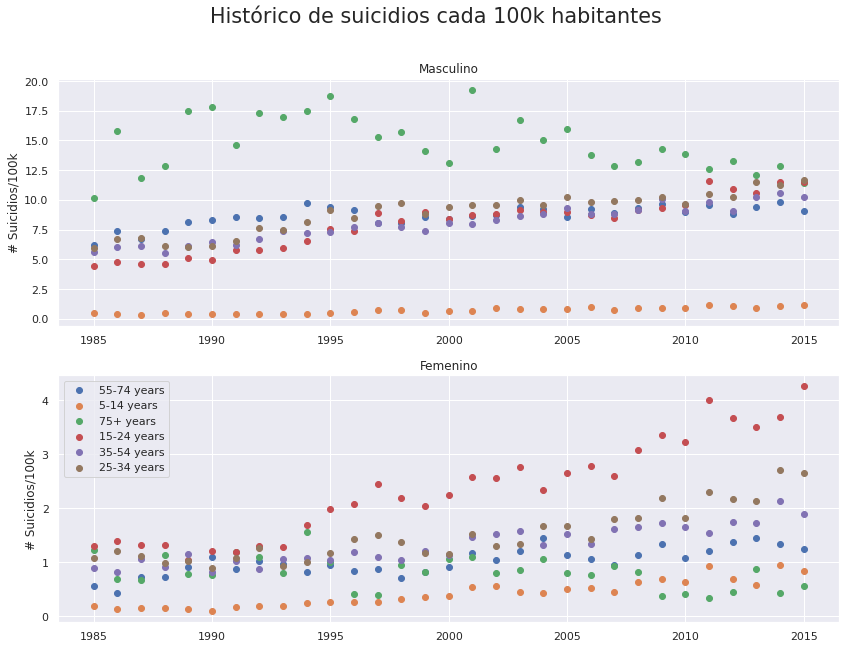

In [76]:
gen = list(set(df["age"]))
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(14,10))

for i in range(len(gen)):
  ax1.scatter(df[(df["country"]=="Mexico")&(df["sex"]=="male")&(df["age"]==gen[i])]["year"],
              df[(df["country"]=="Mexico")&(df["sex"]=="male")&(df["age"]==gen[i])]["suicides/100k pop"],
              label=gen[i])
  ax2.scatter(df[(df["country"]=="Mexico")&(df["sex"]=="female")&(df["age"]==gen[i])]["year"],
              df[(df["country"]=="Mexico")&(df["sex"]=="female")&(df["age"]==gen[i])]["suicides/100k pop"],
              label=gen[i])

ax1.set_title('Masculino')
ax1.set_ylabel("# Suicidios/100k")

ax2.set_title('Femenino')
ax2.set_ylabel("# Suicidios/100k")

fig.suptitle("Histórico de suicidios cada 100k habitantes",fontsize ="xx-large")
plt.legend(loc="best")
fig.show()

# Gráficas de barras 

In [21]:
#Un data set más resumido con los promedios históricos

df_prom = pd.read_csv(base_path + "suicidios_prom_historico.csv")
df_prom.head()

,Unnamed: 0,Pais,Promedio de suicidios/100k,Prom suicidios femeninos /100k,GDP promedio,HDI/year promedio,Prom suicidios masculinos /100k,E5_14,E15_24,E25_34,E35_54,E55_74,E75+,GIGen,Silent,Boomers,GenX,Millenials,GenZ
0,0,Albania,3.50,1859.05,0.67,2.42,4.59,0.43,4.51,4.28,3.64,3.09,5.06,4.47,3.83,3.38,4.63,1.63,0.68
1,1,Antigua and Barbuda,0.55,10448.19,0.78,0.10,1.01,0.00,0.00,0.28,1.17,1.87,0.00,0.00,1.42,1.24,0.00,0.00,0.00
2,2,Argentina,10.47,7914.10,0.78,3.80,17.14,0.68,8.85,7.79,8.53,13.23,23.73,25.11,14.74,7.96,6.21,6.63,0.86
3,3,Armenia,3.28,1873.92,0.69,1.61,4.94,0.20,1.25,2.18,3.27,4.95,7.69,7.07,6.48,3.34,1.90,0.90,0.29
4,4,Aruba,9.50,24221.64,NaN,3.29,15.72,0.00,4.06,13.09,9.68,10.64,19.55,76.58,7.14,10.34,12.02,2.21,0.00


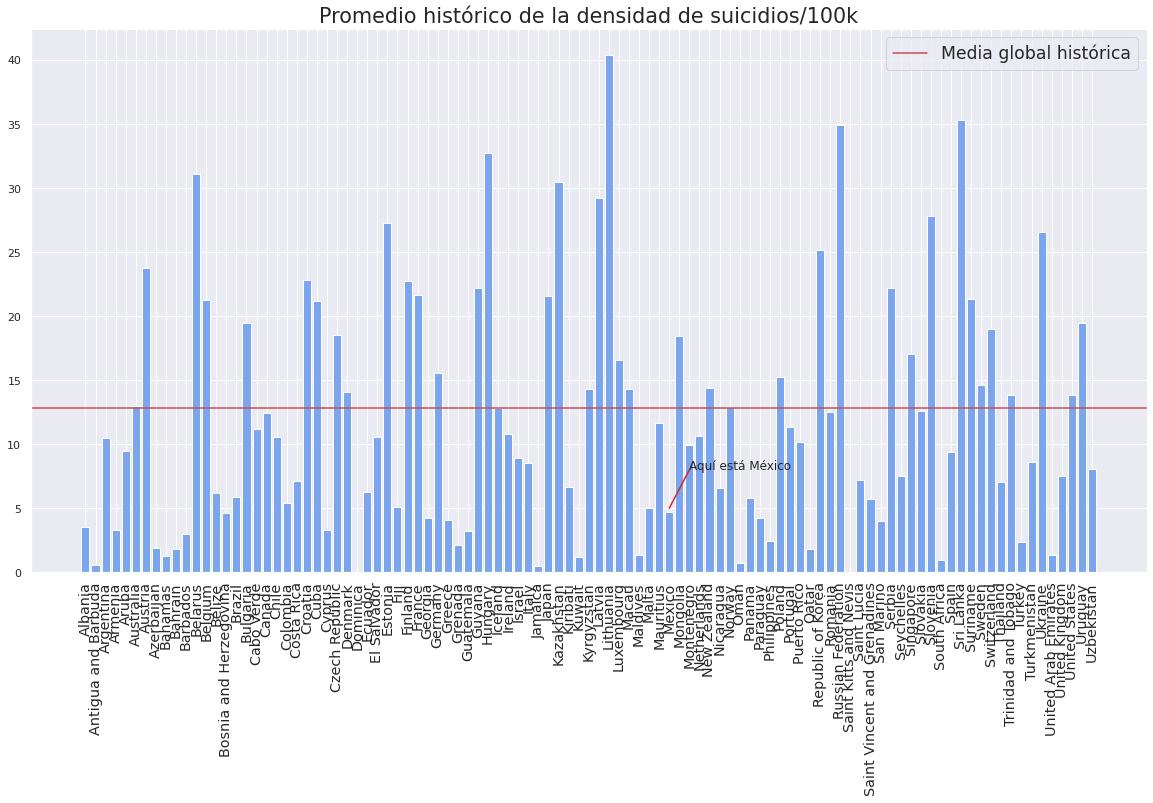

In [53]:
#Vamos a ver cómo hacer gráficas de barras bien coquetas
 
f=plt.figure(figsize=(20,10))
plt.bar(df_prom["Pais"],df_prom["Promedio de suicidios/100k"],color="#7ba5ed")

#Para poner una rejilla
plt.grid(True)
#Para poner texto
plt.text(60,8, "Aquí está México")
#Complementando con una linea para indicar
plt.plot([58,60], [5,8],c="#d12828");

#Permite poner una gráfica horizontal
plt.axhline(y=12.82, color='r', linestyle='-',label="Media global histórica")
plt.title("Promedio histórico de la densidad de suicidios/100k",fontsize='xx-large')

#Permite girar las etiquetas
plt.xticks(rotation=90,fontsize='large')
plt.legend(loc="best",fontsize='x-large')
plt.show()

#Para guardar una figura
f.savefig("suicidios_paises.png")
#f.savefig(base_path+"suicidios_paises.png")

<img src="https://matplotlib.org/stable/_images/anatomy.png">